In [1]:
import numpy as np

I = np.eye(5)

In [2]:
print(I)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [3]:
b = np.array([1,2,3,4,5])

In [4]:
print(b)

[1 2 3 4 5]


In [5]:
I.dot(b)

array([1., 2., 3., 4., 5.])

Suppose that I want to solve the system $Ix=b$. Then I use the following code

In [6]:
import numpy.linalg as la

la.solve(I,b)

array([1., 2., 3., 4., 5.])

In [7]:
A = np.zeros((3,3))

In [8]:
print(A)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
for i in range(3):
    for j in range(3):
        A[i,j] = 3*i + j+1

In [10]:
print(A)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [11]:
#print(A.dot(I))

In [12]:
I = np.eye(3)

In [13]:
print(A.dot(I))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [14]:
s = 'Hello my name is Ryan'

In [15]:
print(s)

Hello my name is Ryan


In [16]:
l = [4,7,8,1]

In [17]:
print(l)

[4, 7, 8, 1]


In [18]:
np.eye?

Now suppose that we want to solve the differential equation $\dot x = x, x(0) = 1$. To solve this numerically, we need to numerically estimate derivatives. We use a difference scheme as follows:


$x_i = x(t_i), t_i = t_{i-1} +h, t_0 = 0$, then we approximate $x'(t_i) \approx = \frac{x_i - x_{i-1}}{h}.

To solve the equation we then create a recurrence relation (there are different options!):

$x_i - x_{i-1} = h x_{i-1}$ (Explicit Euler Scheme)
$x_i - x_{i-1} = h x_i$ (Implicit Euler Scheme)

Let's solve on the interval $[0,1]$, using both types of schemes:

In [19]:
h  =.1

In [20]:
num_steps = int(np.ceil(1./h)) #The np.ceil is defensive coding: what if h doesn't divide [0,1] evenly
print(num_steps)
t = np.linspace(0,1,num_steps+1)
h = 1./num_steps #This updates h to account for the possibility that it changed due to np.ceil.

10


In [21]:
print(t)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [22]:
x = np.zeros(t.shape)

In [23]:
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
x[0] = 1.

In [25]:
for i in range(len(x)-1):
    x[i+1] = x[i]/(1-h)# + h*x[i]

In [26]:
print(x)

[1.         1.11111111 1.2345679  1.37174211 1.5241579  1.69350878
 1.88167642 2.09075158 2.32305731 2.58117479 2.86797199]


In [27]:
print(np.exp(t))

[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872127
 1.8221188  2.01375271 2.22554093 2.45960311 2.71828183]


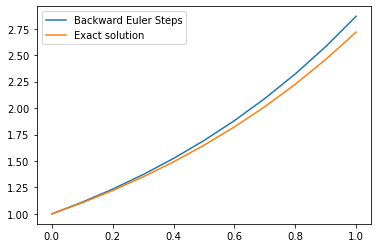

In [28]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

line1, = ax.plot(t, x, label='Backward Euler Steps')
line2, = ax.plot(t,np.exp(t), label='Exact solution')
ax.legend()
plt.show()

We can make these solvers much more efficient by using matrices:
$x_{i+1} = x_{i} + hx_i, x_0 = 1$
$\begin{pmatrix} 1 & 0 & 0 & ... \\ -1-h & 1 & 0 & ... \\ 0 & -1-h & 1 & ... \\ \vdots \end{pmatrix} \begin{pmatrix} x_0 \\ x_1 \\ \vdots \\ x_n \end{pmatrix} = \begin{pmatrix} 1  \\ 0 \\ \vdots \end{pmatrix}$

In [29]:
A = np.eye(len(t))
B = np.diag((-1-h)*np.ones(len(t)-1),-1)
sol_Mat = A + B
b = np.zeros(len(t))
b[0] = 1.
x_sol = la.solve(sol_Mat,b)

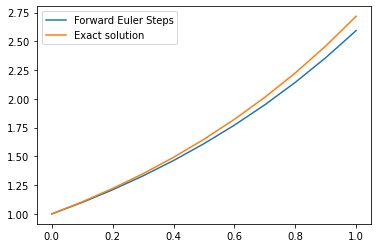

In [30]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

line1, = ax.plot(t, x_sol, label='Forward Euler Steps')
line2, = ax.plot(t,np.exp(t), label='Exact solution')
ax.legend()
plt.show()

There are packages which automatically solve the ODEs that we are interested in. We will often use them. scipy.integrate.odeint is one of them.

In [31]:
def RHS(x,t):


    dydt = x

    return dydt

y0 = 1.
from scipy.integrate import odeint

sol = odeint(RHS, y0, t)

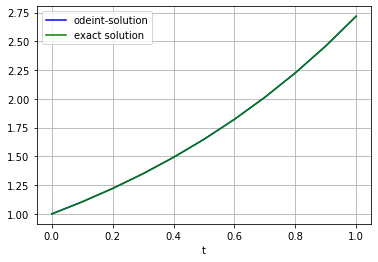

In [32]:
plt.plot(t, sol[:], 'b', label='odeint-solution')

plt.plot(t, np.exp(t), 'g', label='exact solution')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()

Homework problem: Solve the equation $x' = x + sin(t)$, with $x(0) = -1/2$, using both forward and backward differences, on the interval $[0,5]$. The exact solution is $-cos(t)/2 - sin(t)/2$. Plot your solutions compared to the true solution. Use matrices. Write a function which takes step size as an input and solves the equation. Also, solve the same equation using odeint.